<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Séries Temporais
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)<br>
Aluno [Rafael Barbosa](https://www.linkedin.com/in/barbosa89/)


---

# **Tópicos**

<ol type="1">
  <li>Introdução;</li>
  <li>Wrangling;</li>
  <li>Decomposição.</li>
</ol>

---

# **Exercícios**

## 1\. Correlação entre consumo de energia elétrica e temperatura

Neste exercício, vamos correlacionar a base de dados de consumo de energia elétrica vista em aula com uma base de dados de temperatura média das tres maiores cidades do sudeste: **São Paulo**, **Rio de Janeiro** e **Belo Horizonte**. Os dados de temperatura estão presente neste [link](https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/temperatura.csv) e foram extraídos diretamento do [site](https://portal.inmet.gov.br) do instituto nacional de meteorologias (INMTE), órgão do governo vinculado ao ministério de agricultura, pecuária e abastecimento.

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns

### **1.1. Energia**

Carregue os dados de **energia** com o código abaixo e responda as perguntas abaixo:

In [41]:
!wget -q 'https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/energia.csv' -O 'energia.csv'

In [42]:
energia = pd.read_csv('energia.csv', sep=';', parse_dates=[0], infer_datetime_format=True)

In [43]:
energia.head()

,referencia,residencial,industrial,comercial
0,2004-01-01,3694386,6977471,2450453
1,2004-02-01,3511541,7084623,2396965
2,2004-03-01,3629455,7087613,2402521
3,2004-04-01,3733863,7384540,2580914
4,2004-05-01,3537269,7258307,2344084


In [44]:
energia.tail()

,referencia,residencial,industrial,comercial
199,2020-08-01,5671487,7697947,3198269
200,2020-09-01,5756787,7723167,3431649
201,2020-10-01,6241392,8042503,3890202
202,2020-11-01,5999235,7878699,3718647
203,2020-12-01,6377972,7832769,3965809


Responda:

 - Qual é a granularidade da base de dados: **1 mês**
 - Qual é o intervalo de tempo (min/max): **2004-01-01/2020-12-01**

### **1.2. Temperatura**

Carregue os dados de **temperatura** com o código abaixo e responda as perguntas abaixo:

In [45]:
!wget -q 'https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/temperatura.csv' -O 'temperatura.csv'

In [46]:
temperatura = pd.read_csv('temperatura.csv', sep=';', parse_dates=[0], infer_datetime_format=True)

In [47]:
temperatura.head()

,referencia,temp-media-sp,temp-media-rj,temp-media-mg
0,2018-07-15,18,21.0,19.0
1,2018-07-16,19,23.0,19.0
2,2018-07-17,17,21.0,19.0
3,2018-07-18,18,23.0,19.0
4,2018-07-19,19,23.0,19.0


In [48]:
temperatura.tail()

,referencia,temp-media-sp,temp-media-rj,temp-media-mg
896,2020-12-27,20,24.0,23.0
897,2020-12-28,21,25.0,23.0
898,2020-12-29,22,27.0,23.0
899,2020-12-30,24,27.0,23.0
900,2020-12-31,23,29.0,24.0


Responda:

 - Qual é a granularidade da base de dados: **1 dia**
 - Qual é o intervalo de tempo (min/max): **2018-07-15/2020-12-31**

## 2\. Processamento

### **2.1. Energia**

Processe o dataframe `energia`:

 - **a.** Atribua ao index a coluna temporal.

In [49]:
# resposta da questão 2.1.a
energia = energia.set_index(keys=['referencia'])

In [50]:
energia.head(3)

,residencial,industrial,comercial
referencia,,,
2004-01-01,3694386,6977471,2450453
2004-02-01,3511541,7084623,2396965
2004-03-01,3629455,7087613,2402521


 - **b.** Selecione apenas os dados entre 2019 e 2020.

In [51]:
# resposta da questão 2.1.b
energia = energia['2019':'2020']
energia.shape

(24, 3)

 > **Atenção:** O seu dataframe final deve conter 24 linhas. Utilize o atributo `shape` para conferir.

### **2.2. Temperatura**

Processe o dataframe `temperatura`:

 - **a.** Atributa ao index a coluna temporal.

In [52]:
# resposta da questão 2.2.a
temperatura = temperatura.set_index(keys=['referencia'])

In [53]:
temperatura.head(3)

,temp-media-sp,temp-media-rj,temp-media-mg
referencia,,,
2018-07-15,18,21.0,19.0
2018-07-16,19,23.0,19.0
2018-07-17,17,21.0,19.0


 - **b.** Selecione apenas os dados entre 2019 e 2020.

In [54]:
# resposta da questão 2.1.b
temperatura = temperatura['2019':'2020']
temperatura.shape

(731, 3)

 - **c.** Remova todas as linhas que apresentem pelo menos um valores nulo.

In [55]:
# resposta da questão 2.2.c
temperatura = temperatura.dropna()
temperatura.shape

(643, 3)

 - **d.** Combine as três colunas de temperatura em uma só chamada de `temp-media` e agregadas pela **média** (obtendo assim uma temperatura média aproximada da região sudeste).

In [56]:
# resposta da questão 2.2.d
temperatura["temp-media"] = temperatura[["temp-media-sp",	"temp-media-rj",	"temp-media-mg"]].mean(axis=1)
temperatura.head(3)

,temp-media-sp,temp-media-rj,temp-media-mg,temp-media
referencia,,,,
2019-01-01,22,28.0,21.0,23.666667
2019-01-02,25,28.0,24.0,25.666667
2019-01-03,26,31.0,24.0,27.000000


 - **f.** Reamostre o dataframe para que sua granularidade seja a mesma dos dados de consumo de energia elétrica. Utilize a **média** como métrica de agregação.

In [57]:
# resposta da questão 2.2.f
temperatura = temperatura.resample(rule='1m').mean()
temperatura.shape

(24, 4)

 > **Atenção:** O seu dataframe final deve conter 24 linhas. Utilize o atributo `shape` para conferir.

## 3\. Correlação

### **3.1. Consumo residencial**

 - **a.** Gere um gráfico de linha para a série temporal de **temperatura** média agregada `temp-media`.

<ipython-input-58-20a634c24cae>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  grafico = sns.lineplot(data=temperatura, x='referencia', y='temp-media', marker="1", palette="pastel")


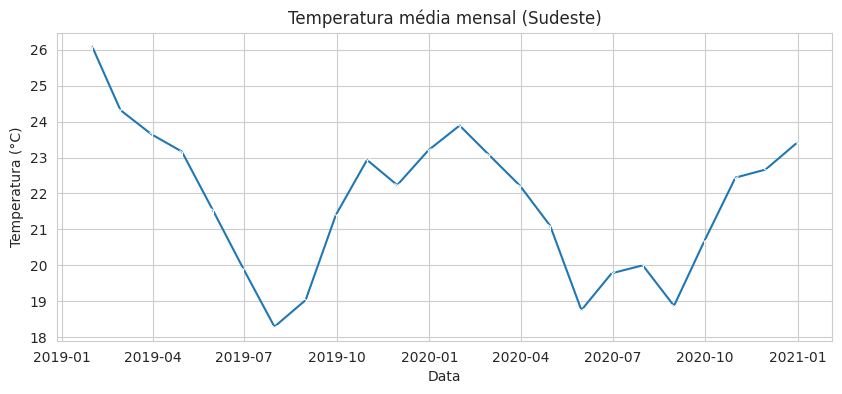

In [58]:
# resposta da questão 3.1.a
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=temperatura, x='referencia', y='temp-media', marker="1", palette="pastel")
  grafico.set(title= 'Temperatura média mensal (Sudeste)', ylabel='Temperatura (°C)', xlabel='Data');
  grafico.figure.set_size_inches(10, 4)

 - **b.** Gere um gráfico de linha para a série temporal do consumo de energia **residencial**.

<ipython-input-59-b0ecc2cba9d4>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  grafico = sns.lineplot(data=energia, x='referencia', y='residencial', marker="1", palette="pastel")


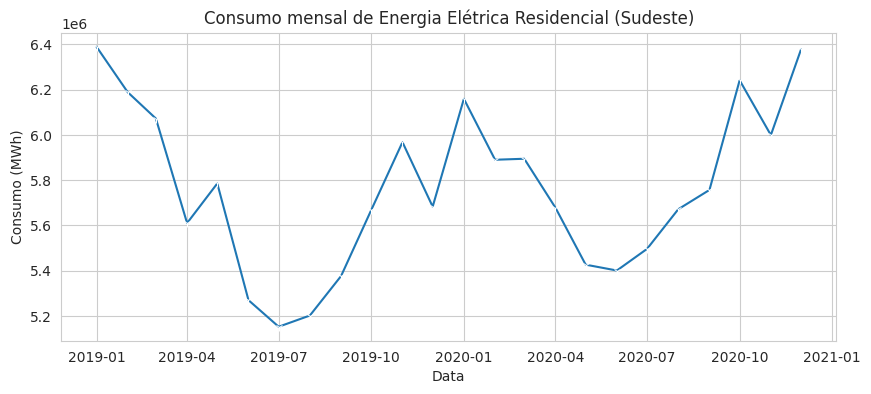

In [59]:
# resposta da questão 3.1.b
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=energia, x='referencia', y='residencial', marker="1", palette="pastel")
  grafico.set(title='Consumo mensal de Energia Elétrica Residencial (Sudeste)', ylabel='Consumo (MWh)', xlabel='Data');
  grafico.figure.set_size_inches(10, 4)

 - **c.** Utilize o método `corrcoef` do pacote Numpy para calcular o coeficiente de Pearson entre o consumo de energia elétrica **residencial** e a **temperatura** média agregada `temp-media`.

In [60]:
# resposta da questão 3.1.c
np.corrcoef(energia['residencial'], temperatura['temp-media'])[0,1]

0.824271822739731

 - **d.** Baseado nas respostas dos items anteriores, responda: A temperatura é um bom atributo para prever o consumo de energia elétrica **residencial**?



**Resposta:** O coeficiente de Pearson de 0,82 indica que a **temperatura é** um bom parâmetro de previsão do consumo de energia elétrica **residencial**.

O coeficiente de Pearson é um valor entre -1 (correlação perfeita negativa) e 1 (correlação perfeita positiva), e 0 indica que não há correlação.

### **3.2. Consumo comercial**

Repita o exercício 3.1. para dados de consumo de energia elétrica **comercial**.

<ipython-input-61-e33b9cce080c>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  grafico = sns.lineplot(data=energia, x='referencia', y='comercial', marker="1", palette="pastel")


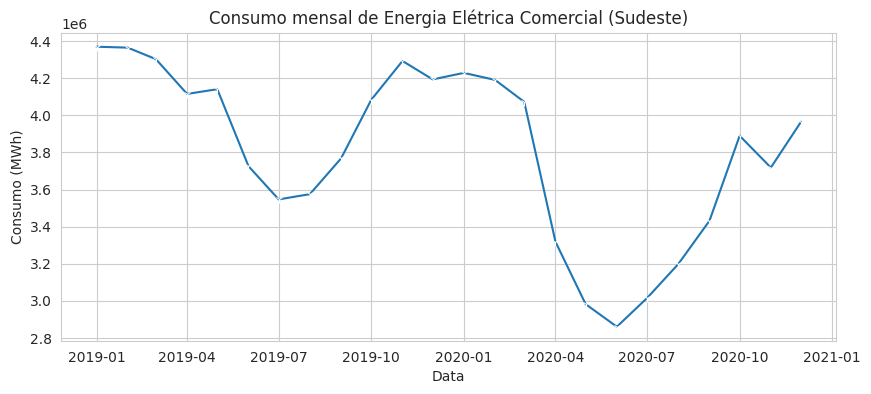

In [61]:
# resposta da questão 3.2.b
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=energia, x='referencia', y='comercial', marker="1", palette="pastel")
  grafico.set(title='Consumo mensal de Energia Elétrica Comercial (Sudeste)', ylabel='Consumo (MWh)', xlabel='Data');
  grafico.figure.set_size_inches(10, 4)

In [62]:
# resposta da questão 3.2.c
np.corrcoef(energia['comercial'], temperatura['temp-media'])[0,1]

0.8235028939103621

**Resposta**: O coeficiente de Pearson de 0,82 indica que a **temperatura é** um bom parâmetro de previsão do consumo de energia elétrica **comercial**.

### **3.3. Consumo industrial**

Repita o exercício 3.1. para dados de consumo de energia elétrica **industrial**.

<ipython-input-63-5871649dd288>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  grafico = sns.lineplot(data=energia, x='referencia', y='industrial', marker="1", palette="pastel")


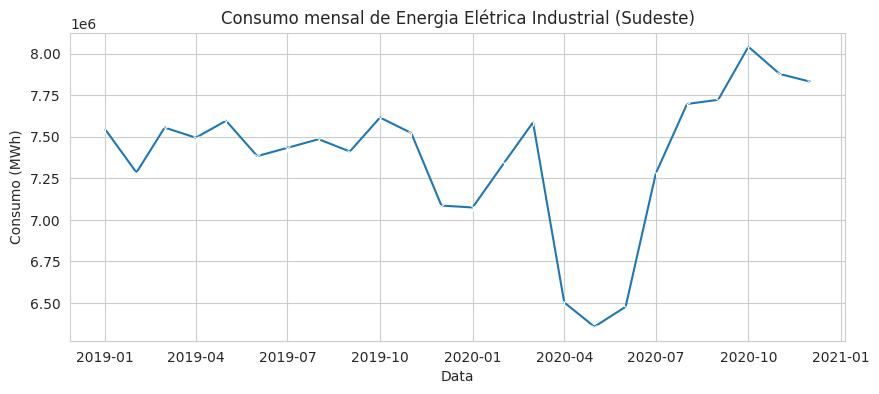

In [63]:
# resposta da questão 3.3.b
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=energia, x='referencia', y='industrial', marker="1", palette="pastel")
  grafico.set(title='Consumo mensal de Energia Elétrica Industrial (Sudeste)', ylabel='Consumo (MWh)', xlabel='Data');
  grafico.figure.set_size_inches(10, 4)

In [64]:
# resposta da questão 3.3.c
np.corrcoef(energia['industrial'], temperatura['temp-media'])[0,1]

0.287322967042256

**Resposta**: O coeficiente de Pearson de 0,29, próximo de zero, indica que a **temperatura não é** um bom parâmetro de previsão do consumo de energia elétrica **industrial** por apresentar baixa correlação para este conjunto de dados.

---